<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/PFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FIN DE GRADO**

Patricia Mediavilla

Este Proyecto Fin de Grado tiene como objetivo emplear técnicas de Machine Learning con el fin de conseguir una clasificación de los datos. Se verán distintos algoritmos de clasificación clásica centrándose en el algoritmo SVM, Support Vector Machine.  La clasificación en este proyecto no va a ser únicamente clásica, se introducirán conceptos cuánticos con el fin de implementar un algoritmo de clasificación de QSVM, Quantum Support Vector Machine. Se verá en profundidad cómo funciona este algoritmo y por último se combinan los dos algoritmos, el cásico y el cuántico para mejorar la precisión del modelo.

Esto se va a plicar a un caso de uso en relación con la empresa, en concreto se pordrá ver si un cliente se va a ir o no de la empresa antes de que suceda, esto de llama **churn** que por definición es una métrica que mide la cantidad de cleintes que han dejado de seguir a una empresa

### Librerías

Se instalan y se descargan las librerías necesarias

In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [4]:
!pip install qiskit
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512611 sha256=59ccfaa60331eea16bda730e8d583b0888aec84ee2cc6b4b65cb01d42826ae63
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448d

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from qiskit.circuit.library import ZZFeatureMap
from sklearn.svm import SVC
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

### Cargar BBDDs

Se carga la base de datos

In [7]:
train_data=pd.read_csv('ml_case_training_data.csv')
train_out=pd.read_csv('ml_case_training_output.csv')

Consta de 2 conjuntos de datos

- Training -> clientes: con diversa información sobre los clientes y su ciclo de vida

- Output -> churn: que muestran los clientes que se han dado de baja.



In [8]:
train_data

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1.0,1732.36,3.0,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1.0,18.89,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1.0,6.60,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1.0,25.46,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,3938087cca2a1c5f86a6a84300a13230,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,7204,0,1353,2012-10-22,2016-10-22,NaN,...,45.308378,f,199.30,18.72,18.72,1.0,109.94,3.0,ldkssxwpmemidmecebumciepifcamkci,13.200
15746,3c3bfc2e2520538f758f22cd44db274a,acefxcckbdxakciukwuwepweawbkwmii,NaN,NaN,40047,0,2563,2003-07-14,2016-07-14,NaN,...,40.606701,f,240.61,32.01,32.01,1.0,471.48,13.0,ldkssxwpmemidmecebumciepifcamkci,41.500
15747,90b5ecb31ae7d12c76ff9095c5fabf2d,NaN,NaN,NaN,7558,0,0,2009-10-08,2016-10-08,NaN,...,44.311378,f,0.00,10.36,10.36,1.0,100.79,6.0,ldkssxwpmemidmecebumciepifcamkci,13.856
15748,0385cc6cdda880627b257eb1a19d8309,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,615,0,538,2013-06-12,2017-01-21,NaN,...,46.305378,f,76.32,33.12,33.12,1.0,17.05,3.0,ldkssxwpmemidmecebumciepifcamkci,13.200


In [9]:
train_out

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


### Reconociemnto de variables

Las variables que encontramos en la base de datos son las siguetes:

- identificación identificación de contacto

- actividad_nueva categoría de la actividad de la empresa

- Campaign_disc_ele código de la campaña de electricidad a la que el cliente se suscribió por última vez

- canal_ventas código del canal de ventas

- contras_12m de consumo eléctrico de los últimos 12 meses

- cons_gas_12m consumo de gas de los últimos 12 meses

- cons_last_month consumo eléctrico del último mes

- date_activ fecha de activación del contrato

- date_end fecha registrada de finalización del contrato

- date_first_activ fecha del primer contrato del cliente

- date_modif_prod fecha de la última modificación del producto

- date_renewal fecha de la próxima renovación del contrato

- Forecast_base_bill_ele Línea base prevista de la factura de electricidad para el próximo mes

- Forecast_base_bill_year Línea base prevista de la factura de electricidad para el año calendario

- Forecast_bill_12m Línea base prevista de la factura de electricidad para 12 meses

- Forecast_cons consumo de electricidad previsto para el próximo mes

- Forecast_cons_12m consumo eléctrico previsto para los próximos 12 meses

- Forecast_cons_year consumo eléctrico previsto para el próximo año natural

- Forecast_discount_energy valor previsto del descuento actual

- Forecast_meter_rent_12m Factura prevista de alquiler de contadores para los próximos 12 meses

- Forecast_price_energy_p1 Precio de energía previsto para el primer período

- Forecast_price_energy_p2 Precio de energía previsto para el segundo período

- Forecast_price_pow_p1 Precio de energía previsto para el primer período

- has_gas indica si clieclient también es cliente de gas

- imp_cons consumo pago actual

- margin_gross_pow_ele margen bruto en suscripción de energía

- margin_net_pow_ele margen neto sobre suscripción de energía

- nb_prod_act número de productos y servicios activos

- net_margin margen neto total

- num_years_antig antigüedad del cliente (en número de años)

- código origin_up de la campaña eléctrica a la que el cliente se suscribió por primera vez

- potencia suscrita pow_max

- Churn: variable binaria si el cleinte abandona la empresa o no

### Preprocesameinto de datos
Las tablas train y out tienen las mismas observaciones y se realcioann por la columna id, por lo que vamos a juntarlas para tener los datos juntos, tendremos las variables y a continuación los outputs.


In [10]:
#Unir la BBDD
train_data_clean = pd.merge(train_data, train_out, on='id')

Observamos los tipos de las variables para mejor comprensión

In [11]:
train_data_clean.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

#### Datos faltantes

Se observa si hay NA en los datos

In [12]:
train_data_clean.isnull().sum()

id                              0
activity_new                 9327
campaign_disc_ele           15750
channel_sales                4132
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12319
date_modif_prod               152
date_renewal                   36
forecast_base_bill_ele      12319
forecast_base_bill_year     12319
forecast_bill_12m           12319
forecast_cons               12319
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      125
forecast_meter_rent_12m         0
forecast_price_energy_p1      125
forecast_price_energy_p2      125
forecast_price_pow_p1         125
has_gas                         1
imp_cons                        1
margin_gross_pow_ele           14
margin_net_pow_ele             14
nb_prod_act                     1
net_margin                     16
num_years_anti

Debido a la canidad de NA que encontramos en algunas de las variables, vamos a eliminar aquillas que consideremos que no nos aportan tanta información en relación con los NA.

In [13]:
# Eliminar las variables
columnas_a_eliminar = ['campaign_disc_ele', 'activity_new', 'date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']
train_data_clean = train_data_clean.drop(columnas_a_eliminar, axis=1)

De las variables que quedan eliminamos los NA

In [14]:
#Eliminar NAs
train_data_clean = train_data_clean.dropna(subset=['channel_sales','forecast_price_energy_p1','date_modif_prod','date_renewal','margin_gross_pow_ele','origin_up'])

#### Datos duplicados

In [15]:
# Eliminar duplicado
train_data_clean = train_data_clean.drop_duplicates()

#### Datos numéricos



Se observa de los datos numéricos las carácterísticas para analizar si los datos son correctos.

In [16]:
train_data_clean.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.127000e+04,1.127000e+04,1.127000e+04,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000
mean,2.020142e+05,3.112199e+04,2.046589e+04,2345.273718,1840.898935,1.103815,68.502391,0.137557,0.051825,43.409210,193.135576,23.450718,22.130855,1.348270,220.429048,4.488909,19.991677,0.104437
std,7.007561e+05,1.758818e+05,8.781853e+04,3907.349902,5014.395450,5.409609,74.363660,0.024885,0.049118,3.706275,474.911643,24.440624,29.887209,1.595707,389.298558,1.175900,19.038761,0.305840
min,-1.169570e+05,-3.037000e+03,-6.202600e+04,-16689.260000,-19057.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-1824.080000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,6.066500e+03,0.000000e+00,0.000000e+00,535.520000,0.000000,0.000000,16.220000,0.115939,0.000000,40.606701,0.000000,12.820000,12.605000,1.000000,53.597500,4.000000,13.150000,0.000000
50%,1.629350e+04,0.000000e+00,9.495000e+02,1210.185000,391.000000,0.000000,19.390000,0.142996,0.084645,44.311378,48.105000,21.480000,21.480000,1.000000,123.995000,4.000000,13.856000,0.000000
75%,5.340700e+04,0.000000e+00,4.337500e+03,2705.012500,1957.500000,0.000000,131.087500,0.146348,0.098841,44.311378,219.177500,29.760000,29.760000,1.000000,279.267500,6.000000,19.800000,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,155432.000000,50.000000,1052.390000,0.273963,0.180691,59.444710,13001.820000,373.430000,373.430000,32.000000,24570.650000,11.000000,360.000000,1.000000


Teneindo en cuenta el contexto de las variables no puede haber valores negativos por lo que vamos a poner el menor valor en lugar de valores negativos, es decir, el 0

In [17]:
# Columnas que no pueden tener negativos
columnas_valor_neg = train_data_clean.select_dtypes(include=['int', 'float']).columns

def replace_negative_with_zero(x):
    return max(0, x)

# Reemplazar los valores negativos por cero
train_data_clean[columnas_valor_neg] = train_data_clean[columnas_valor_neg].applymap(replace_negative_with_zero)


In [13]:
train_data_clean.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.152000e+04,1.152000e+04,1.152000e+04,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,2.028722e+05,3.114459e+04,2.056902e+04,2351.759772,1845.816493,1.110937,68.488148,0.137572,0.051785,43.423656,193.692177,23.997256,23.718095,1.348437,222.767749,4.491319,20.017224,0.104427
std,7.022433e+05,1.765699e+05,8.788054e+04,3911.087990,4981.301976,5.426927,74.367119,0.024856,0.049113,3.713930,471.792452,22.265569,21.511938,1.605869,380.131681,1.177204,19.431284,0.305827
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,6.062750e+03,0.000000e+00,0.000000e+00,535.485000,0.000000,0.000000,16.220000,0.115939,0.000000,40.606701,0.000000,12.820000,12.715000,1.000000,53.507500,4.000000,13.150000,0.000000
50%,1.625800e+04,0.000000e+00,9.480000e+02,1210.185000,389.000000,0.000000,19.390000,0.143076,0.084490,44.311378,47.840000,21.480000,21.480000,1.000000,124.155000,4.000000,13.856000,0.000000
75%,5.336100e+04,0.000000e+00,4.336750e+03,2704.502500,1966.250000,0.000000,131.080000,0.146348,0.098841,44.311378,219.132500,29.760000,29.760000,1.000000,279.845000,6.000000,19.800000,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,155432.000000,50.000000,1052.390000,0.273963,0.180691,59.444710,13001.820000,373.430000,373.430000,32.000000,24570.650000,11.000000,360.000000,1.000000


Se observa la distribución y se decide operar con los outliers, ya que representan a toda la sociedad.

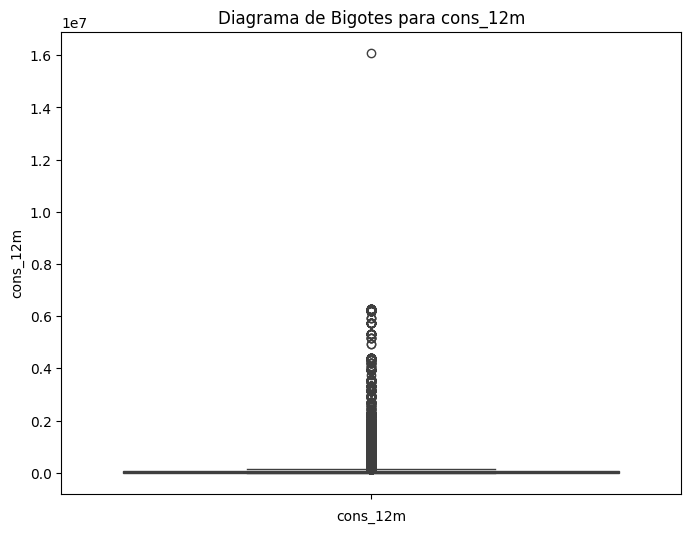

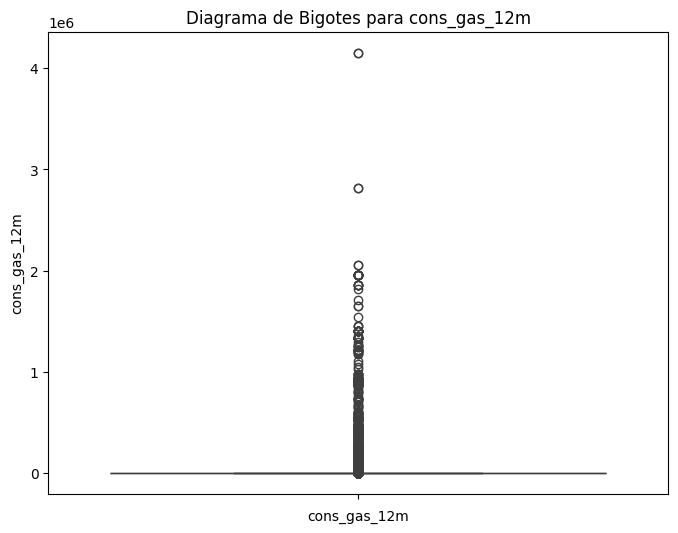

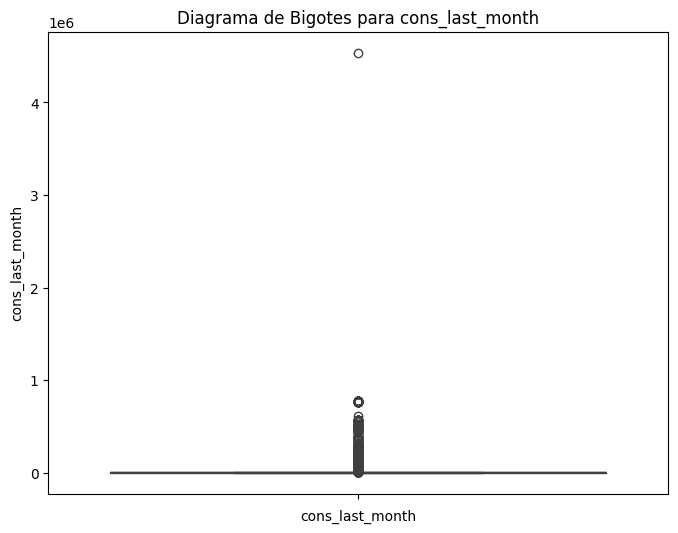

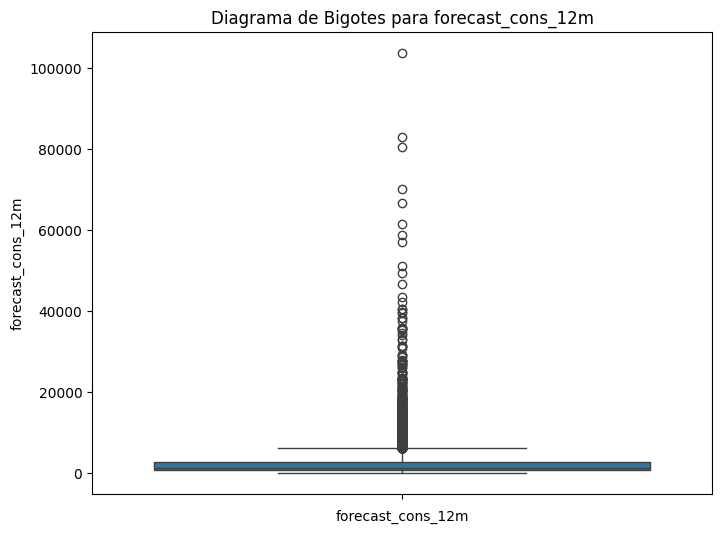

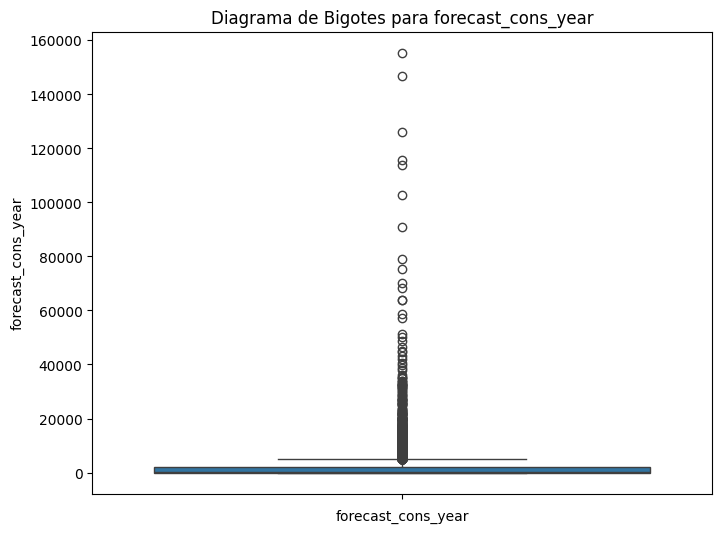

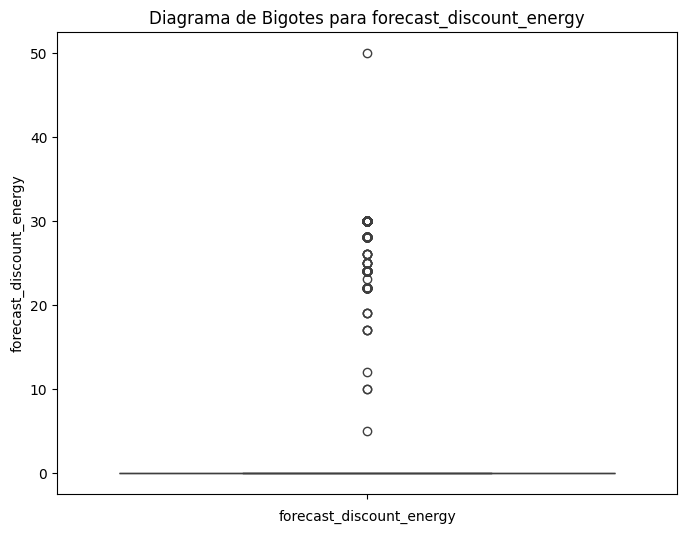

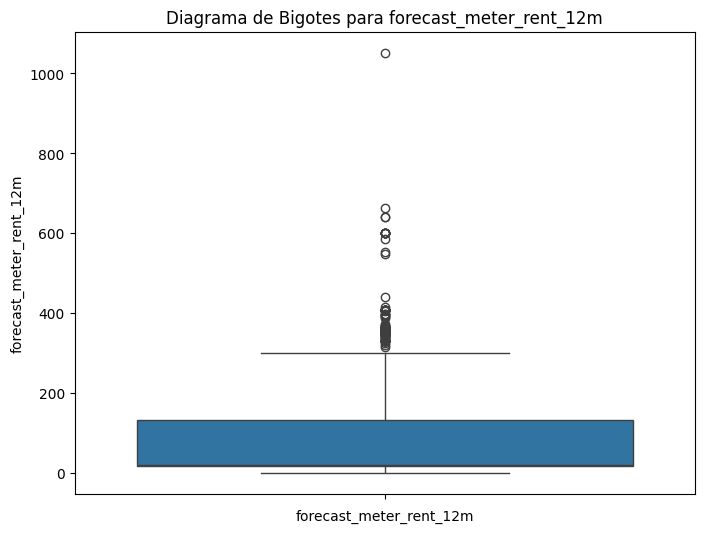

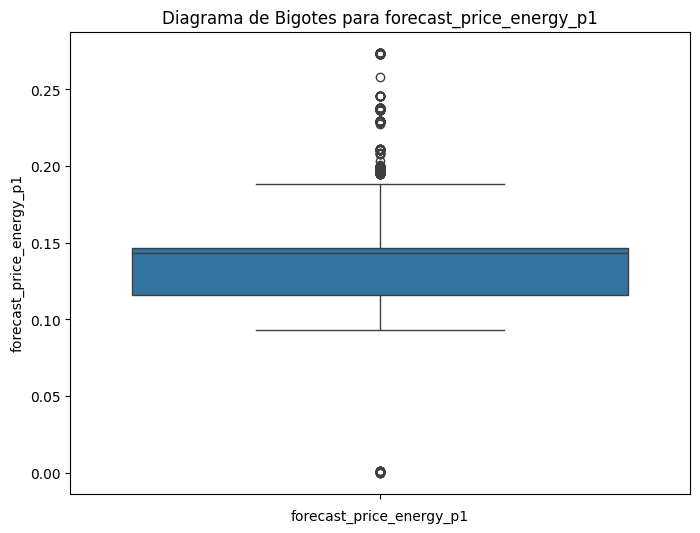

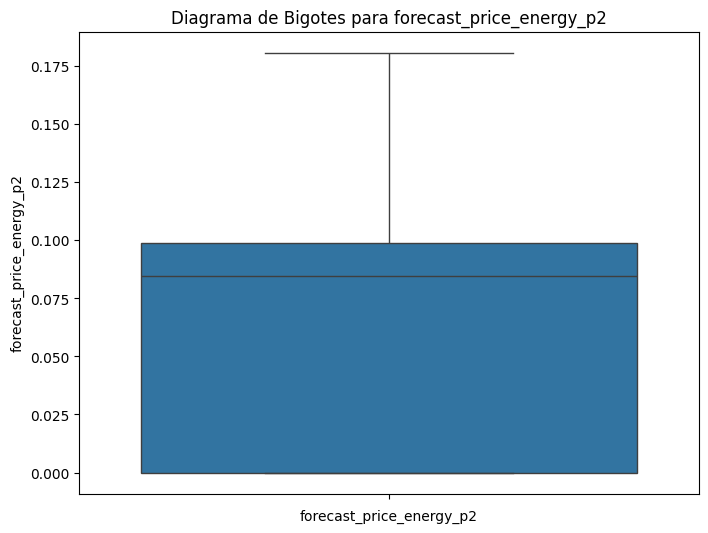

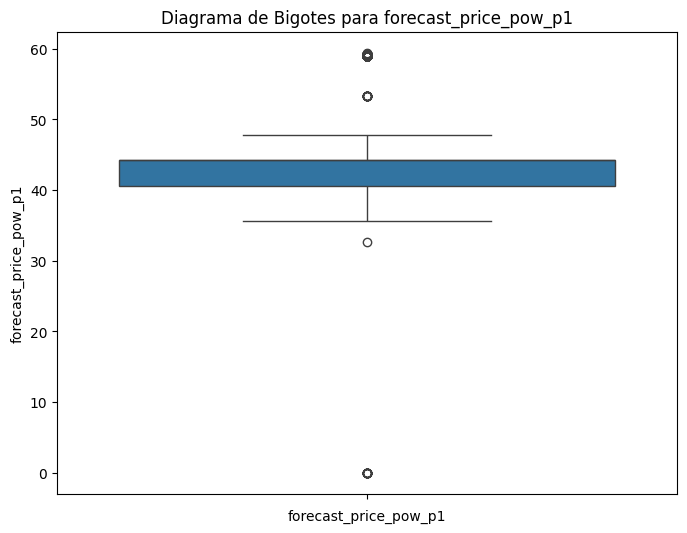

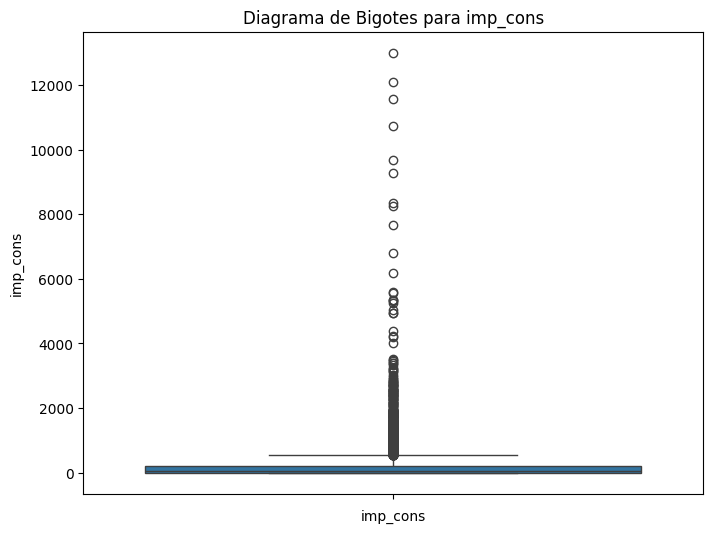

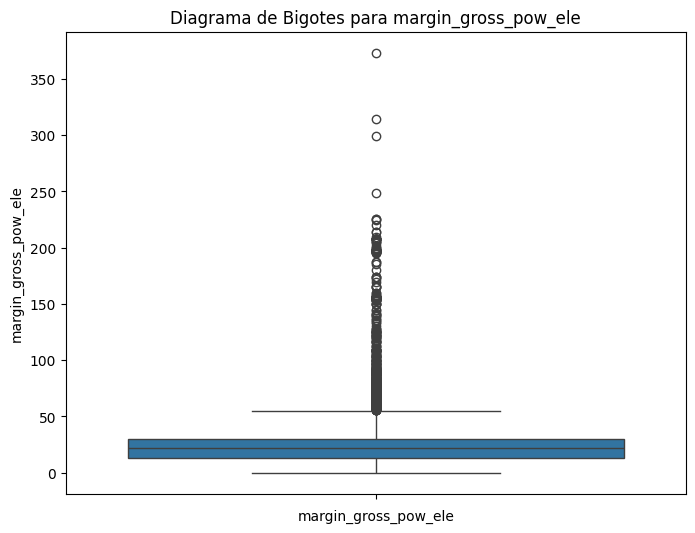

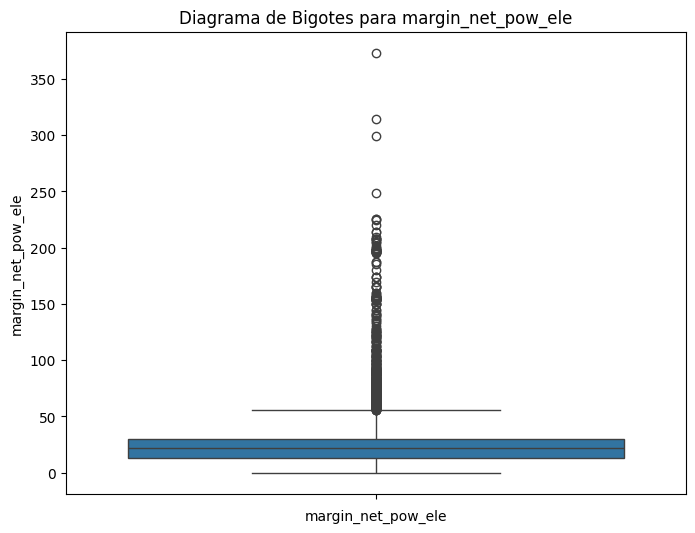

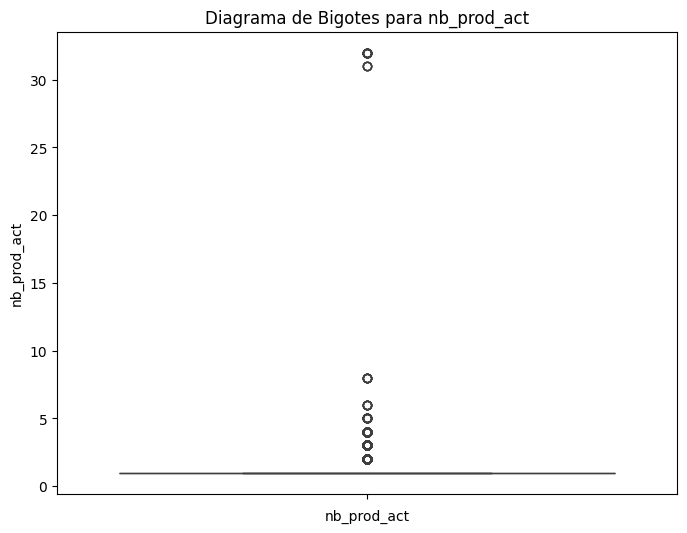

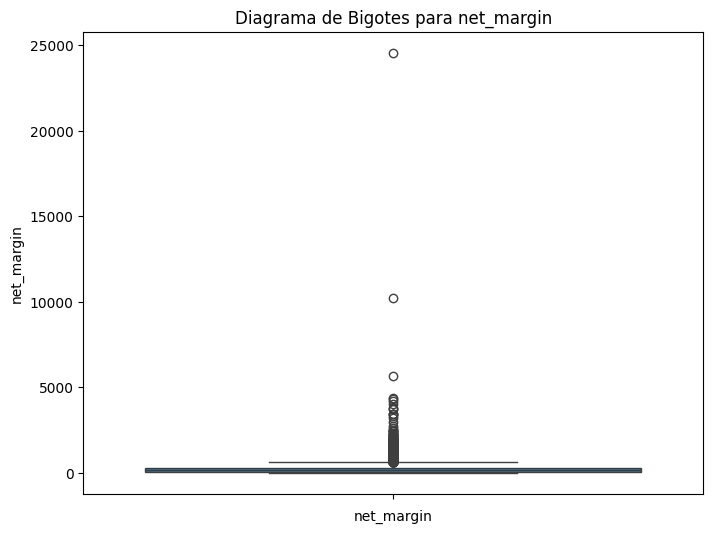

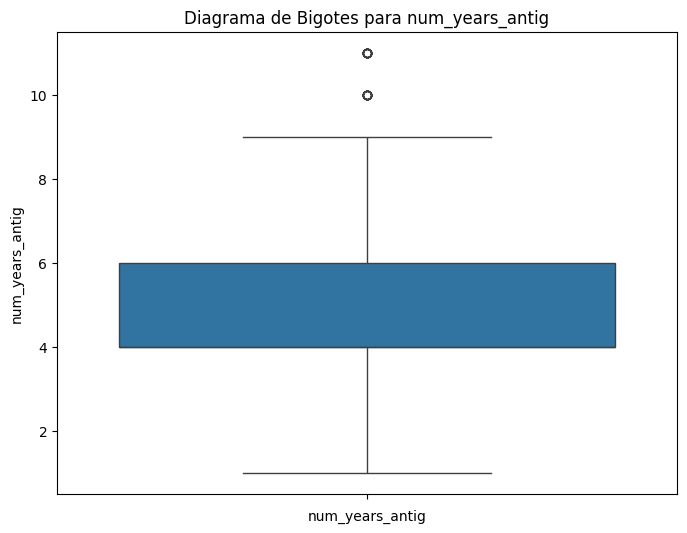

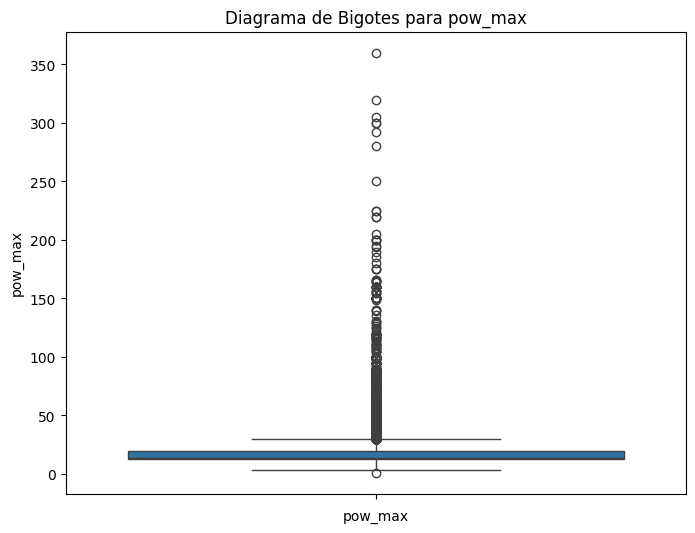

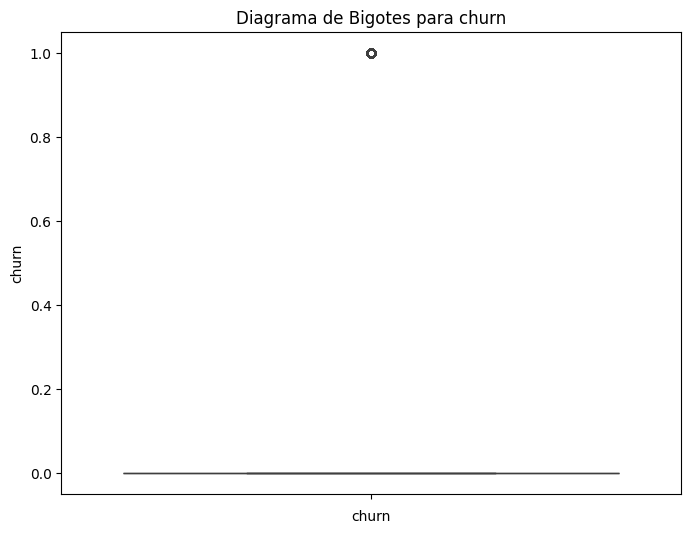

In [18]:
# Crear un diagrama de bigotes para todas las variables numéricas
for columna in columnas_valor_neg:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data_clean[columna])
    plt.xlabel(columna)
    plt.title(f'Diagrama de Bigotes para {columna}')
    plt.show()


#### Datos no numéricos

Hacer una varibale que sea una fecha menos la otra para tener la duracion del cleinte en la empresa

date_activ fecha de activación del contrato
date_end fecha registrada de finalización del contrato

In [19]:
#Pasamos las fechas a formato fecha
train_data_clean['date_activ'] = pd.to_datetime(train_data_clean['date_activ'])
train_data_clean['date_end'] = pd.to_datetime(train_data_clean['date_end'])
train_data_clean['date_modif_prod'] = pd.to_datetime(train_data_clean['date_modif_prod'])
train_data_clean['date_renewal'] = pd.to_datetime(train_data_clean['date_renewal'])


# Calcular la diferencia en días entre las dos fechas (variable creada por mi)
train_data_clean['total_days'] = (train_data_clean['date_end'] - train_data_clean['date_activ']).dt.days

In [20]:
# Columnas que no son numéricas
columnas_no_numericas = ['channel_sales','origin_up','has_gas']

# Iterar sobre las columnas no numéricas y mostrar los valores únicos
for columna in columnas_no_numericas:
    recuento_valores = train_data_clean[columna].value_counts()
    print(f"Recuento de valores en la columna '{columna}':")
    print(recuento_valores)
    print()

Recuento de valores en la columna 'channel_sales':
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6955
lmkebamcaaclubfxadlmueccxoimlema    1992
usilxuppasemubllopkaafesmlibmsdf    1385
ewpakwlliwisiwduibdlfmalxowmwpci     925
sddiedcslfslkckwlfkdpoeeailfpeds       9
epumfxlbckeskwekxbiuasklxalciiuu       4
Name: count, dtype: int64

Recuento de valores en la columna 'origin_up':
origin_up
lxidpiddsbxsbosboudacockeimpuepw    6731
kamkkxfxxuwbdslkwifmmcsiusiuosws    2792
ldkssxwpmemidmecebumciepifcamkci    1746
usapbepcfoloekilkwsdiboslwaxobdp       1
Name: count, dtype: int64

Recuento de valores en la columna 'has_gas':
has_gas
f    9287
t    1983
Name: count, dtype: int64



Aqui se va hacer unos cambios de varibales porque los algoritmos de clasificacion que se van a utilizar no funcionan con valores NO numéricos.

Se ha investigado y se ha llegado a la conclusion de que la mejor manera de transformar estos datos es con targget encoding.

In [16]:
#pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [17]:
#from category_encoders import TargetEncoder

# Variables a codificar
target_encoder = TargetEncoder(cols=['channel_sales','origin_up','has_gas'])

# Ajusta y transforma el codificador
target_encoder.fit(train_data_clean[['channel_sales','origin_up','has_gas']], train_data_clean['churn'])
df_encoded = target_encoder.transform(train_data_clean[['channel_sales','origin_up','has_gas']])
train_data_clean = train_data_clean.join(df_encoded.add_suffix('_encoded'))

#Eliminamos las variables no numéricas
columnas_a_eliminar = ['channel_sales','origin_up','has_gas']

# Elimina las columnas del DataFrame
train_data_clean.drop(columnas_a_eliminar, axis=1, inplace=True)

# BBDD resultante
train_data_clean


,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,total_days,channel_sales_encoded,origin_up_encoded,has_gas_encoded
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,...,0.00,1,1732.36,3,180.000,0,1460,0.055937,0.083006,0.108899
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,28.60,1,6.60,6,13.856,0,2192,0.121749,0.055653,0.108899
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,30.22,1,25.46,6,13.200,0,2192,0.055937,0.055653,0.108899
5,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,...,0.00,1,823.18,6,75.000,0,2192,0.121749,0.130251,0.108899
7,1aa498825382410b098937d65c4ec26d,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,...,33.12,1,118.89,4,13.200,1,1827,0.101983,0.130251,0.108899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,c49217f16a06263e5381eaba94a67a8b,87146,0,11367,2013-02-08,2016-02-08,2013-02-08,2015-02-09,712.33,713,...,66.00,1,87.14,3,26.400,0,1095,0.121749,0.130251,0.108899
16091,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,27.88,2,381.77,4,15.000,0,1445,0.121749,0.130251,0.083457
16092,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,0.00,1,90.34,3,6.000,1,1461,0.121749,0.130251,0.108899
16093,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,39.84,1,20.38,4,15.935,1,1460,0.121749,0.130251,0.108899


Como al hacer este encoding hay valoes de las nuevas variables los valores que nos quedan, hay algunos que son superiores a 1, lo que se va a hacer es escalar los datos con el método **StandScaler** y no con MinMaxScaler

### Estandarizar los datos

In [21]:
#from sklearn.preprocessing import StandardScaler

# Selecciona solo las columnas numéricas excepto 'churn'
columnas_numericas = train_data_clean.select_dtypes(include=['int64', 'float64']).drop('churn', axis=1).columns

# Inicializa el escalador
scaler = StandardScaler()

# Ajusta el escalador
scaler.fit(train_data_clean[columnas_numericas])

# Transforma los datos
train_data_clean[columnas_numericas] = scaler.transform(train_data_clean[columnas_numericas])

Comprobamos que todos los tipos de las variables sean aptas para nuetro modelo

In [22]:
train_data_clean.dtypes

id                                  object
channel_sales                       object
cons_12m                           float64
cons_gas_12m                       float64
cons_last_month                    float64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                 float64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                             object
imp_cons                           float64
margin_gross_pow_ele               float64
margin_net_pow_ele                 float64
nb_prod_act                        float64
net_margin                         float64
num_years_antig                    float64
origin_up  

## MODELOS DE MACHINE LEARNING

Se crea una bbdd con la que se va a trabajar que solo contenga las columnas numéricas y la etiqueta

In [23]:
bbdd_numerica = train_data_clean[columnas_numericas.tolist() + ['churn']]

Se observa la correlación entre los datos para ver si hayq ue modificar variables

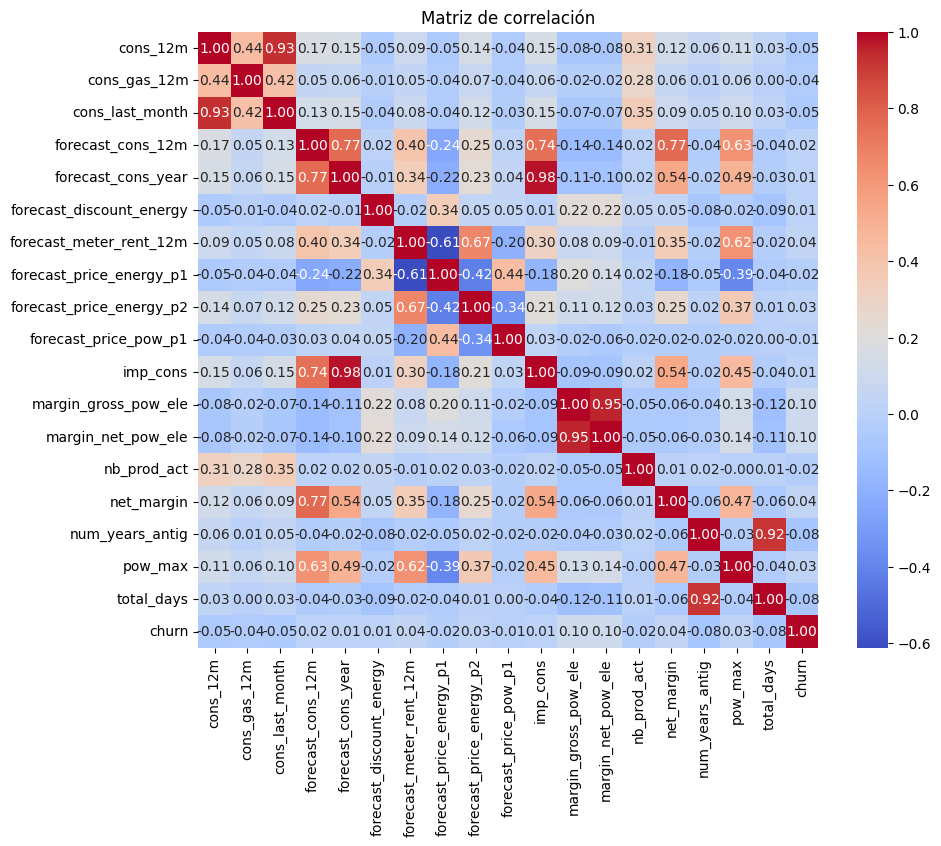

In [24]:
correlation_matrix = bbdd_numerica.corr()

# Visualiza la matriz de correlación utilizando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Observamos que hay 4 pares de variables que están muy correlacionadas:

•	Cons_12m – cons_last_month

•	Imp_cons – forecast_cons_year

•	Margin_gross_pow_ele – margin_net_pow_ele

•	Total_days – num_years_antig

Se elimina una de cada


In [22]:
# Columnas a eliminar
columnas_eliminar_relacionadas = ['forecast_cons_year', 'cons_12m', 'margin_gross_pow_ele','num_years_antig']

# Utiliza el método drop para eliminar las columnas
bbdd_numerica = bbdd_numerica.drop(columns=columnas_eliminar_relacionadas)

Se mira la cantidad de observaciones de cada tipo que tenemos

In [23]:
conteo = bbdd_numerica['churn'].value_counts()
conteo

churn
0    10317
1     1203
Name: count, dtype: int64

hacer undersampling con los registros de 0 y de 1 porque sino la prediccion no se hace bien. Se dejará una tercera parte de clientes que se van

In [25]:
filas_0 = train_data_clean[train_data_clean['churn'] == 0]
filas_1 = train_data_clean[train_data_clean['churn'] == 1]

df_0 = filas_0.head(3609)
train_data_final = pd.concat([df_0, filas_1])

In [26]:
X = train_data_final[columnas_numericas]
Y = train_data_final['churn']

## Modelo Random Forest

Se crea el modelo de random forest haciendo gridsearch para sacar la mejor combinación de parámetros.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
#import numpy as np

# Definir el modelo base
model = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, 30, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 4, 6],   # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar para cada división
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar grid search
grid_search.fit(X, Y)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de precisión:", grid_search.best_score_)

# Configurar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Opcional: Realizar validación cruzada con el modelo final para confirmar los resultados
scores = cross_val_score(best_model, X, Y, cv=10, scoring='accuracy')
print(f'Precisión promedio con el mejor modelo: {np.mean(scores)}')


Fitting 10 folds for each of 324 candidates, totalling 3240 fits


KeyboardInterrupt: 

(tarda 53 mins)
Mejor combinación :

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}

Mejor score de precisión: 0.6517375518672199

Se crea el modelo con la mejor combinación de parámetros

In [27]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score
#import numpy as np


# Definir el modelo con los mejores parámetros encontrados
final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=6,
    min_samples_leaf=2,
    max_features='auto',
    random_state=42
)

# Realizar validación cruzada
scores_rf = cross_val_score(final_model, X, Y, cv=10, scoring='accuracy')
#Curva roc

# Imprimir los resultados de la validación cruzada
print(f'Precisión promedio: {np.mean(scores_rf)}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Precisión promedio: 0.7592936819210175


Vemos la precidión por división de datos

In [28]:
#from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
# Entrenar el modelo con todo el conjunto de datos
final_model.fit(X_train, Y_train)

# Tu modelo está ahora listo para hacer predicciones en nuevos datos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=6, random_state=42)

In [31]:
#from sklearn.metrics import accuracy_score


# Suponiendo que tienes un conjunto de prueba X_test, y_test
y_pred_rf = final_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, y_pred_rf)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy}')

Precisión del modelo en el conjunto de prueba: 0.7369519832985386


Creamos la matriz de confusión

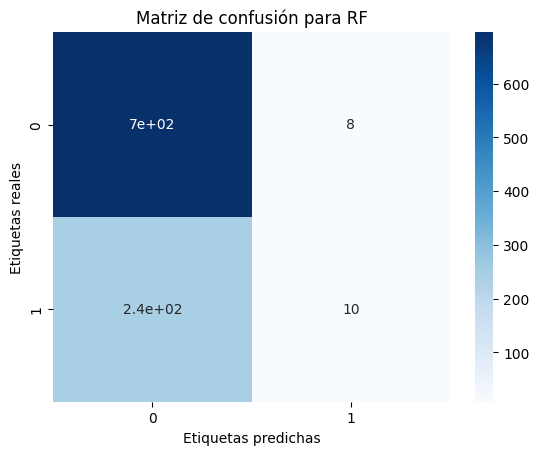

In [38]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns

# matriz de confusión para RF
cm_rf = confusion_matrix(Y_test, y_pred_rf)

# visualización de la matriz de confusión
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Matriz de confusión para RF')
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas reales')
plt.show()

## Modelo SVM



Se crea un modelo SVM con gridsearch para sacar la mejor combinación de parámetros. Se utiliza validadción cruzada

In [ ]:
#from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.svm import SVC


# Define los parámetros que deseas optimizar
parametros = {'C': [0.1, 1, 1.5, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 1.5, 2], 'kernel': ['linear', 'rbf', 'sigmoid','poly']}
# Inicializa el clasificador SVM
svm = SVC()

# Inicializa la búsqueda de cuadrícula
grid_search = GridSearchCV(svm, parametros, cv=5)

# Realiza la búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search.fit(X, Y)

# Muestra los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Utiliza los mejores parámetros para el SVM
svm_optimo = SVC(**grid_search.best_params_)

# Realiza la validación cruzada con los parámetros optimizados
puntuaciones = cross_val_score(svm_optimo, X, Y, cv=5)

# Muestra las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada:", puntuaciones)

# Muestra la precisión media de validación cruzada
print("Precisión media de validación cruzada:", puntuaciones.mean())


KeyboardInterrupt: 

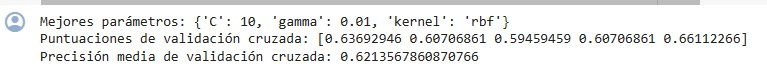

Tarda unas 2 horas

- C:10

- gamma = 0.01

- kernel = rbf

Precición: 0.62135

Creamos el modelo ganador y evaluamos con validación cruzada

In [34]:
# Inicializa el clasificador SVM con los mejores parámetros
svm_optimo = SVC(C=10, gamma=0.01, kernel='rbf')

# Realizar validación cruzada
scores_SVM = cross_val_score(svm_optimo, X, Y, cv=10, scoring='accuracy')
#Curva roc

# Imprimir los resultados de la validación cruzada
print(f'Precisión promedio: {np.mean(scores_SVM)}')

Precisión promedio: 0.7547016535494973


Miramos la precisión por separación de datos.

In [35]:
#from sklearn.svm import SVC

# Entrena el modelo SVM con los datos de entrenamiento
svm_optimo.fit(X_train, Y_train)

# Evalúa el modelo en el conjunto de prueba
precision = svm_optimo.score(X_test, Y_test)
print("Precisión del modelo SVM optimizado:", precision)

Precisión del modelo SVM optimizado: 0.7359081419624217


Modelos extras

In [36]:
#from sklearn import svm
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score


#SVM lineal (c=1)
lineal = svm.SVC(kernel='linear')
lineal.fit(X_train, Y_train)
y_pred_lineal = lineal.predict(X_test)
accuracy_lineal = accuracy_score(Y_test, y_pred_lineal)

# SVM radial (c=1, gamma= scale= 1/(n_features*X.var()))
radial = svm.SVC(kernel='rbf')
radial.fit(X_train, Y_train)
y_pred_radial = radial.predict(X_test)
accuracy_radial = accuracy_score(Y_test, y_pred_radial)

# SVM de kernel polinómico (c=1, gamma=scale)
pol = svm.SVC(kernel='poly', degree=3)
pol.fit(X_train, Y_train)
y_pred_pol = pol.predict(X_test)
accuracy_pol = accuracy_score(Y_test, y_pred_pol)

# SVM sigmoidal(c=1, gamma=scale)
sig = svm.SVC(kernel='sigmoid')
sig.fit(X_train, Y_train)
y_pred_sig = sig.predict(X_test)
accuracy_sig = accuracy_score(Y_test, y_pred_sig)

precisions = [['SVM lineal', accuracy_lineal],
              ['SVM radial', accuracy_radial],
              ['SVM polinómico', accuracy_pol],
              ['SVM sigmoidal', accuracy_sig]]

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

    Modelo SVM  Precisión
    SVM lineal   0.734864
    SVM radial   0.734864
SVM polinómico   0.730689
 SVM sigmoidal   0.678497


Matriz de confución para SVM

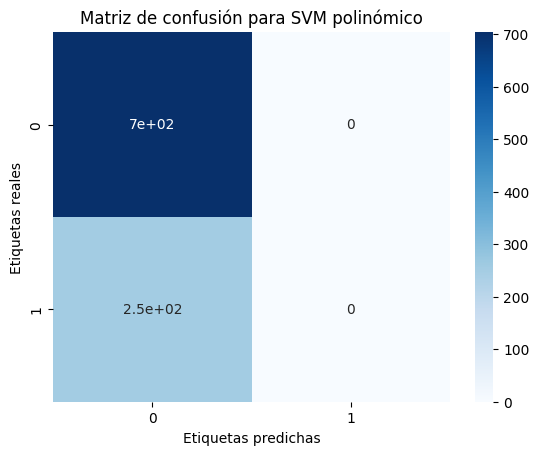

In [37]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns


# matriz de confusión para SVM lineal
cm_pol = confusion_matrix(Y_test, y_pred_radial)

# visualización de la matriz de confusión
sns.heatmap(cm_pol, annot=True, cmap='Blues')
plt.title('Matriz de confusión para SVM polinómico')
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas reales')
plt.show()

## Comparación de los modelos clásicos por curvas de aprendizaje

In [39]:
#import numpy as np

train_sizes = [50, 100, 200, 300, 500, 700, 900, 1100, 1300, 1500,1700,1900,2100,2300,2500,2700,3000]
train_sizes = [size for size in train_sizes if size <= len(X_train)]

In [40]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score

# Resultados de precisión para cada tamaño
accuracies_rf = []
accuracies_svm = []

for size in train_sizes:
    # Subconjunto de entrenamiento
    X_subset = X_train[:size]
    Y_subset = Y_train[:size]

    # Entrenar Random Forest
    model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=6, min_samples_leaf=2, max_features='auto', random_state=42)
    model_rf.fit(X_subset, Y_subset)
    Y_pred_rf = model_rf.predict(X_test)
    accuracies_rf.append(accuracy_score(Y_test, Y_pred_rf))

    # Entrenar SVM
    model_svm = SVC(C=10, gamma=0.01, kernel='rbf')
    model_svm.fit(X_subset, Y_subset)
    Y_pred_svm = model_svm.predict(X_test)
    accuracies_svm.append(accuracy_score(Y_test, Y_pred_svm))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

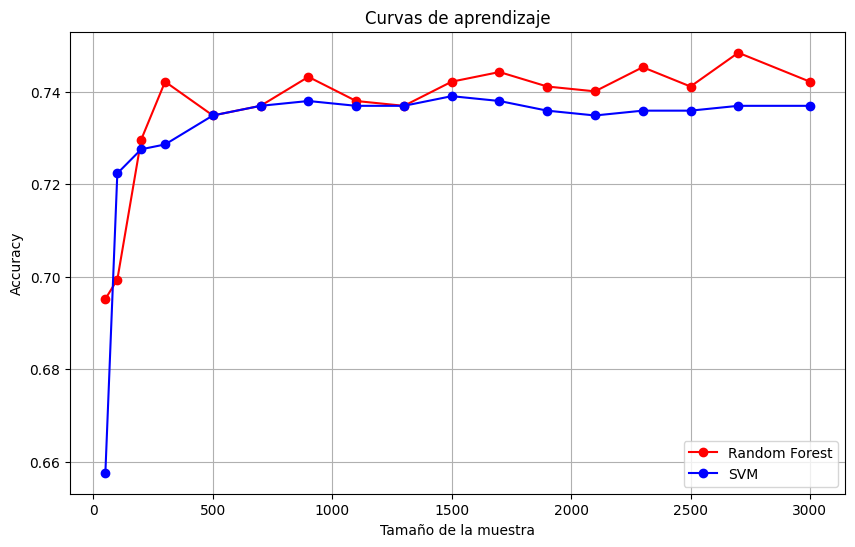

In [41]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies_rf, marker='o', linestyle='-', color='r', label='Random Forest')
plt.plot(train_sizes, accuracies_svm, marker='o', linestyle='-', color='b', label='SVM')
plt.title('Curvas de aprendizaje')
plt.xlabel('Tamaño de la muestra')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Modelo QSVM

Las librerías de quiskit cambian constante metete, por lo que ha sido un reto desarrollar este algoritmo.

In [ ]:
#!pip install qiskit
#!pip install qiskit-machine-learning

In [ ]:
#from qiskit.circuit.library import ZZFeatureMap
#from sklearn.svm import SVC
#from qiskit.primitives import Sampler
#from qiskit_algorithms.state_fidelities import ComputeUncompute
#from qiskit_machine_learning.kernels import FidelityQuantumKernel

Defini mapa de caracteristicas cuanticas

In [42]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear") #probar disitntos entralazaminrtos el full no merece la pena porque on muy largos y no se ejecuta

sampler = Sampler() #Hace automatiamnete lo de elegir computadro y tal

fidelity = ComputeUncompute(sampler=sampler) #Hacia alente y hacia atras

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map) #Crea para toda la matriz

- ZZFeatureMap: se utiliza en la preparación de datos en la computación cuántica:

  - Feature_dimension=2: Esto indica que el espacio de características tiene dos dimensiones (dos features). En un contexto de SVM cuántica, las características representarían los qubits y sus estados.
  - Reps=2: Esto se refiere a la cantidad de repeticiones de las compuertas cuánticas en la feature map. Puede controlar la complejidad y expresividad de la feature map.
  - Entanglement="linear": Esto especifica cómo los qubits están entrelazados en la feature map. En este caso, se utiliza un entrelazamiento lineal.
- Sampler: se utiliza en el backend para realizar operaciones cuánticas.

- ComputeUncompute: se utiliza para calcular la fidelidad(similitus entre los dos estados) entre dos estados cuánticos

- FidelityQuantumKernel: utiliza la fidelidad calculada por ComputeUncompute y la feature map cuántica adhoc_feature_map para construir un kernel cuántico. Los kernels cuánticos se utilizan en SVM cuántica para medir similitudes entre pares de datos después de ser mapeados a un espacio cuántico.

Continuamos con el código

SE VA A CREAR UNA BBDD MUCHO MÁS PEQUEÑA POR LA LIMITACIÓN DEL COMPUTADOR EMPLEADO PARA HACER ESTE PROYECTO

In [43]:
# Muestra 20 observaciones
train_data_final_q = train_data_final.sample(n=20, random_state=42)

In [44]:
X_q = train_data_final_q[columnas_numericas]
Y_q = train_data_final_q['churn']

In [45]:
X_train_q, X_test_q, Y_train_q, Y_test_q = train_test_split(X_q, Y_q, test_size=0.2, random_state=42)

In [ ]:
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)

adhoc_svc.fit(X_train, Y_train)

adhoc_score_callable_function = adhoc_svc.score(X_test, Y_test)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

- Hemos creado nuestro modelo definiendo que nuestro kernel será el definido anteriormente para medir las similitudes entre pares de datos en lugar de uno lineal convencional
- Lo entrenamos con los datos de entrenamiento
- Lo evaluamos con los datos de test, calculando su puntación de precisión en función de las etiquetas reales.
Vemos que con el modelo cuántico hemos obtenido una precisión de 0.785, por lo que es relativamente bueno, sin embargo es menor que el accuracy del modelo lineal que era 0.85

Guado mis predicciones en otra variable igual que las predicciones clásicas para poder comparar los dos vectores.

In [ ]:
predicciones_cuanticas = adhoc_svc.predict(X_test)
accuracy_cuantico = accuracy_score(Y_test, predicciones_cuanticas)
accuracy_cuantico

Compara los vectores a ver como son de iguales, tanto las predicciones lianeales como las cuánticas.

In [ ]:
accuracy_comparar = accuracy_score(predicciones_clasicas, predicciones_cuanticas)
accuracy_comparar

Notas Importantes
Limitaciones de la Computación Cuántica Actual: Los computadores cuánticos actuales tienen limitaciones significativas en términos de número de qubits y coherencia cuántica, lo que puede limitar el tamaño de los conjuntos de datos y la complejidad de los problemas que puedes abordar eficazmente.
Simulación vs Hardware Real: Para el desarrollo y las pruebas iniciales, es probable que quieras utilizar simuladores cuánticos, como el 'statevector_simulator' que hemos utilizado aquí. Eventualmente, podrías experimentar con hardware cuántico real a través de IBM Quantum Experience o servicios similares.
Exploración y Experimentación: La computación cuántica es un campo de investigación activo y en rápida evolución. Te animo a explorar diferentes mapas de características, ajustes de parámetros y técnicas de preprocesamiento de datos para optimizar el rendimiento de tu QSVM.
Este ejemplo es bastante básico y conceptual. Implementar un QSVM para un caso de uso específico puede requerir ajustes y optimizaciones adicionales. Te recomiendo consultar la documentación oficial de Qiskit y explorar tutoriales relacionados con QSVM para obtener una comprensión más profunda y adaptar tu implementación a las necesidades específicas de tu proyecto.